The below code is just a trial and is not used.
The second block of code is used to produce the graph of density vs lambda. 
The third block is used  to get screenshots of LGOL simulation.
In the second code i first tried with lambda for smaller values and in the latest part you see now interrupted did not finish so a previous result was used if you play with the lambda you can get the output.

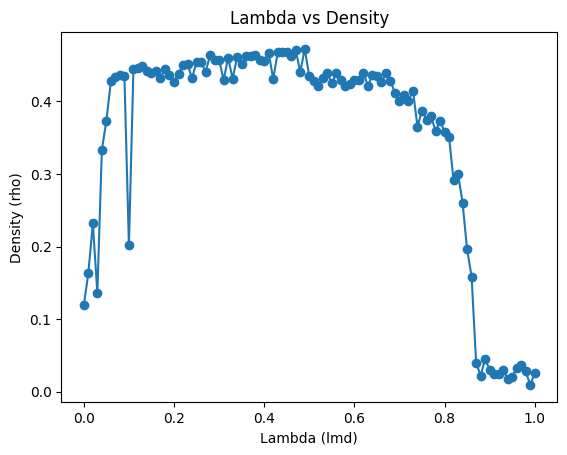

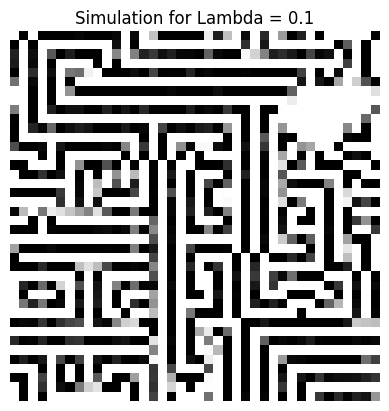

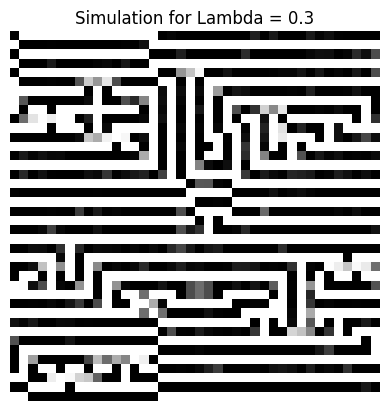

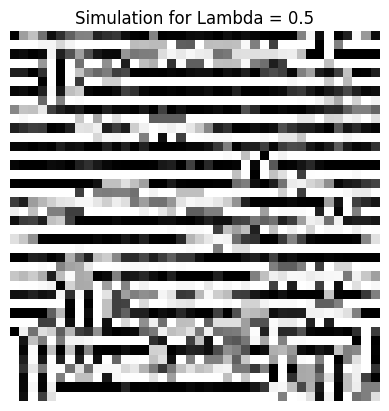

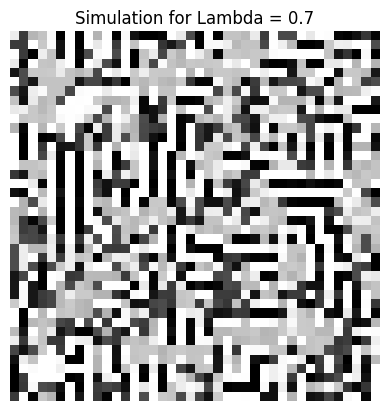

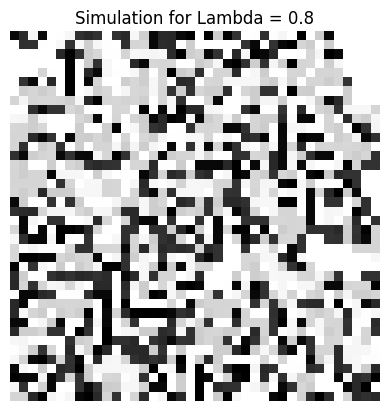

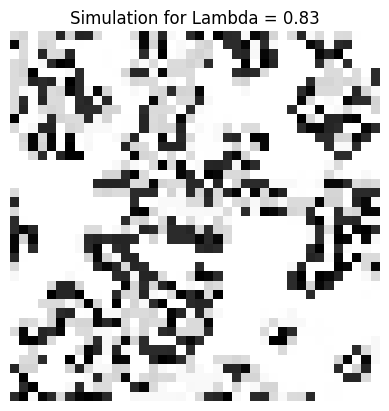

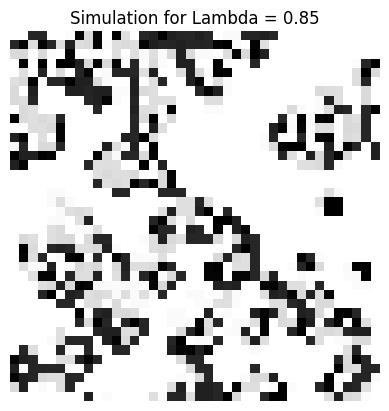

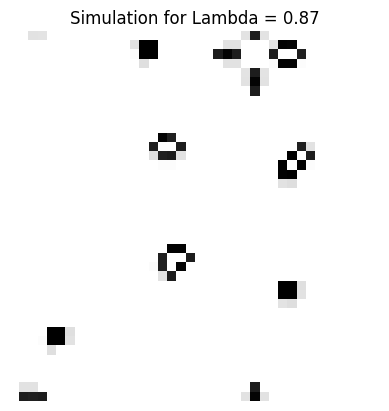

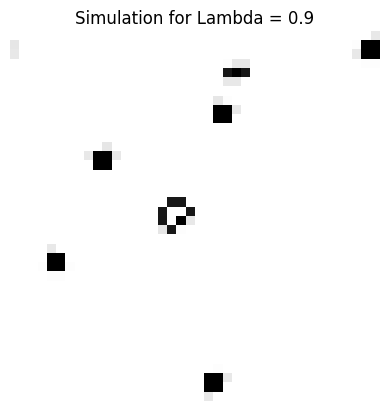

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import clear_output

lmd = 0.84
t1 = 1.5
t2 = 2.5
t3 = 3.5

N = 40
M = 20

# a = np.zeros((N,N))
a[N//2-M//2:N//2+M//2,N//2-M//2:N//2+M//2] = np.random.random((M,M))

a[N//2:N//2+3,N//2:N//2+3] = np.array([[lmd, 0, 0],
                                                       [lmd, 0, lmd],
                                                       [lmd, 0, 0]])

# Define the convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

for n in range(1000):
    # Perform 2D convolution
    b = convolve2d(a, kernel, mode='same', boundary='wrap')

    # Growth and decay
    a += lmd*((1-a)*(b >= t2)*(b <= t3) - a*((b < t1) + (b > t3)))

    if (n % 1 == 0):
        clear_output(wait=True)
        plt.imshow(a)
        plt.axis('off')
        plt.show()


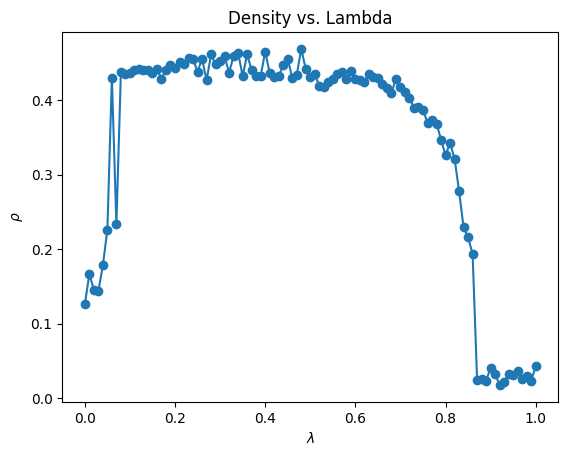

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d  # Import convolve2d function
from IPython.display import clear_output

# Function to run the Game of Life simulation for a given lambda
def run_simulation(lmd, N, M, t1, t2, t3, num_iterations=100000): # play with this for runtime
    # Initialize a as a random matrix
    a = np.random.random((N, N))
    a[N//2-M//2:N//2+M//2,N//2-M//2:N//2+M//2] = np.random.random((M,M))
    a[N//2:N//2+3,N//2:N//2+3] = np.array([[lmd, 0, 0],
                                           [lmd, 0, lmd],
                                           [lmd, 0, 0]])
    
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])

    for n in range(num_iterations):
        b = convolve2d(a, kernel, mode='same', boundary='wrap')
        a += lmd*((1-a)*(b >= t2)*(b <= t3) - a*((b < t1) + (b > t3)))
    
    return a

# Function to calculate density
def calculate_density(grid):
    return np.sum(grid) / grid.size

# Parameters
N = 50
M = 20
t1 = 1.5
t2 = 2.5
t3 = 3.5

# Lambda values to test
lambda_values = np.arange(0, 1.001, 0.001) # play with this increase to decrease runtime

# Results storage
density_values = []

# Run simulations and calculate densities
for lmd in lambda_values:
    grid = run_simulation(lmd, N, M, t1, t2, t3)
    density = calculate_density(grid)
    density_values.append(density)

# Plot lambda vs density
plt.figure(figsize=(8, 6))  # Set figure size to ensure it's a rectangle
plt.plot(lambda_values, density_values, marker='o', linestyle='-')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\rho$')
plt.title('Density vs. Lambda')

# Set x-axis and y-axis limits
plt.xlim(0, 1)
plt.ylim(0, 0.5)  # Limit y-axis to maximum value of 0.5

# Set x-axis ticks to increments of 0.1
plt.xticks(np.arange(0, 1.1, 0.1))

plt.show()


KeyboardInterrupt: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import clear_output

lmd = 0.85
t1 = 1.5
t2 = 2.5
t3 = 3.5

N = 40
M = 20

# a = np.zeros((N,N))
a[N//2-M//2:N//2+M//2,N//2-M//2:N//2+M//2] = np.random.random((M,M))

a[N//2:N//2+3,N//2:N//2+3] = np.array([[lmd, 0, 0],
                                                       [lmd, 0, lmd],
                                                       [lmd, 0, 0]])

# Define the convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

for n in range(10000):
    # Perform 2D convolution
    b = convolve2d(a, kernel, mode='same', boundary='wrap')

    # Growth and decay
    a += lmd*((1-a)*(b >= t2)*(b <= t3) - a*((b < t1) + (b > t3)))

    if (n % 1 == 0):
        clear_output(wait=True)
        plt.imshow(a)
        plt.axis('off')
        plt.show()
